In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

!pip install pandas scikit-learn


In [26]:
# Load the dataset
df = pd.read_csv('insurance1.csv')


In [27]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19.0,female,27.9,0,yes,southwest,16884.92
1,18.0,male,33.8,1,no,southeast,1725.55
2,28.0,male,33.0,3,no,southeast,4449.46
3,33.0,male,22.7,0,no,northwest,21984.47
4,32.0,male,28.9,0,no,northwest,3866.86


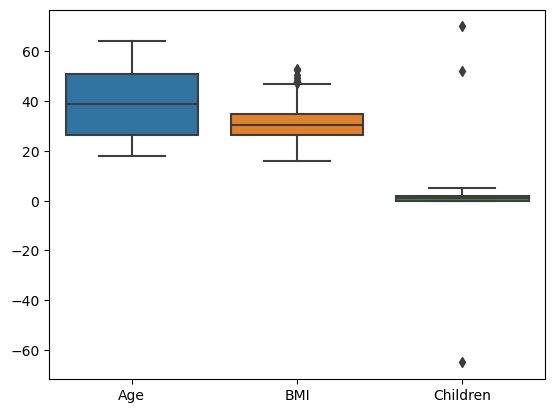

In [15]:
sns.boxplot(data=df[['Age', 'BMI', 'Children']])
plt.show()

In [19]:
missing_values = df.isnull().sum()
print(missing_values)


Age         0.0
Gender      0.0
BMI         0.0
Children    0.0
Smoker      0.0
Region      0.0
Expenses    0.0
dtype: float64


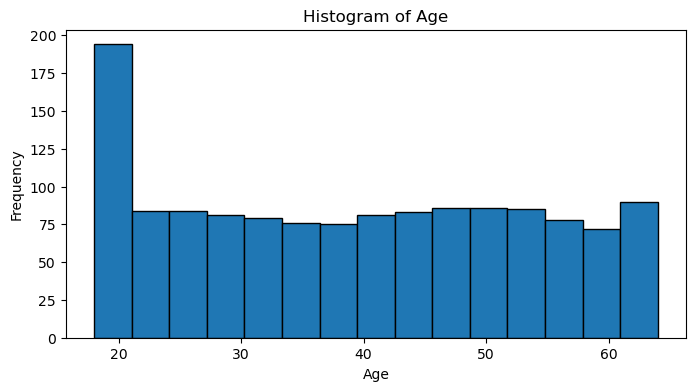

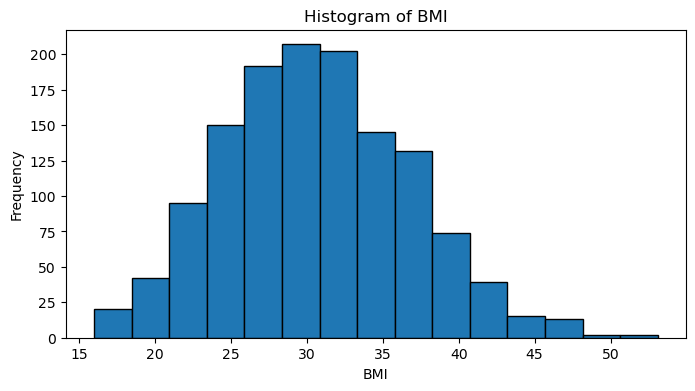

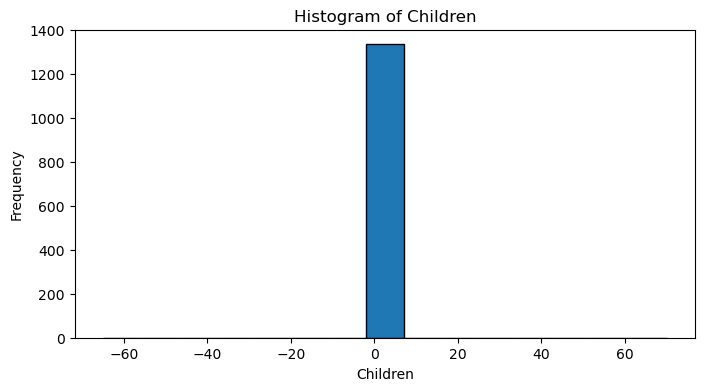

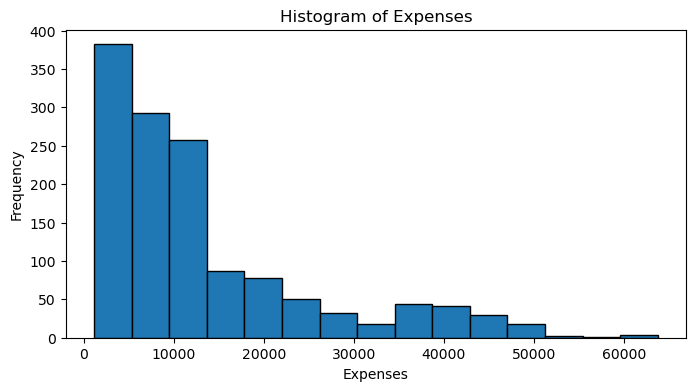

In [28]:
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=15, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

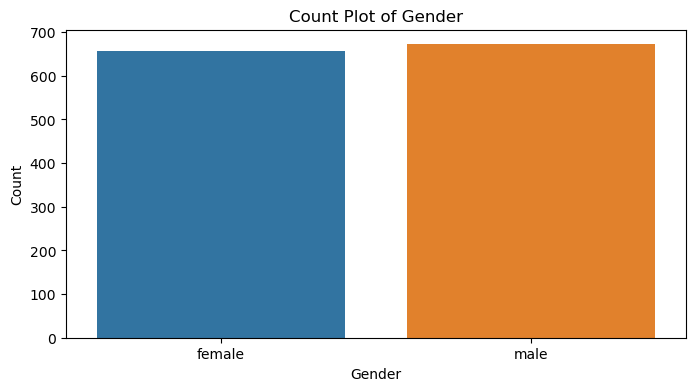

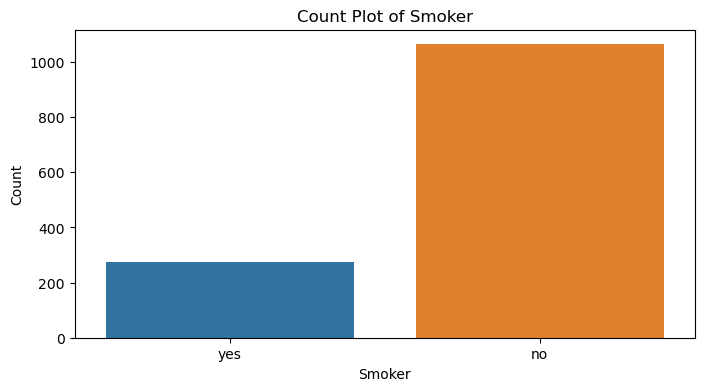

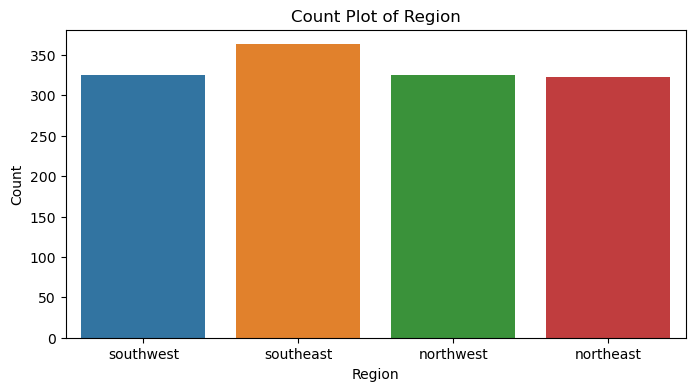

In [29]:
categorical_columns = ['Gender', 'Smoker', 'Region']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [30]:
# Select only the numerical columns
numerical_columns = df[['Age', 'BMI', 'Children', 'Expenses']]

In [31]:
# Descriptive statistics
descriptive_stats = numerical_columns.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
               Age          BMI     Children      Expenses
count  1334.000000  1330.000000  1338.000000   1337.000000
mean     39.176912    30.676917     1.136024  13273.306111
std      14.041367     6.094868     3.194662  12114.083012
min      18.000000    16.000000   -65.000000   1121.870000
25%      26.250000    26.300000     0.000000   4738.270000
50%      39.000000    30.400000     1.000000   9377.900000
75%      51.000000    34.700000     2.000000  16657.720000
max      64.000000    53.100000    70.000000  63770.430000


In [32]:
# Additional variability measures
# Variance
variance = numerical_columns.var()
print("\nVariance:")
print(variance)


Variance:
Age         1.971600e+02
BMI         3.714742e+01
Children    1.020587e+01
Expenses    1.467510e+08
dtype: float64


In [48]:
median_age = df['Age'].median()
print("The median age is:", median_age)

The median age is: 39.0


In [51]:
q3_bmi = df['BMI'].quantile(0.75)
print("The third quartile (Q3) of BMI is:", q3_bmi)

The third quartile (Q3) of BMI is: 34.650000000000006


In [49]:
# Standard Deviation
std_dev = numerical_columns.std()
print("\nStandard Deviation:")
print(std_dev)


Standard Deviation:
Age            14.041367
BMI             6.094868
Children        3.194662
Expenses    12114.083012
dtype: float64


In [34]:
# Compute quartiles
quartiles = numerical_columns.quantile([0.25, 0.50, 0.75])
print("Quartiles:")
print(quartiles)

Quartiles:
        Age   BMI  Children  Expenses
0.25  26.25  26.3       0.0   4738.27
0.50  39.00  30.4       1.0   9377.90
0.75  51.00  34.7       2.0  16657.72


(array([0.00243196, 0.00972782, 0.00486391, 0.02067163, 0.02371157,
        0.03404738, 0.04316722, 0.04803113, 0.04924711, 0.06748678,
        0.05715096, 0.06870275, 0.05593499, 0.06687879, 0.05107107,
        0.03708733, 0.04559917, 0.03465537, 0.01945565, 0.02553554,
        0.01337576, 0.01033581, 0.00486391, 0.00425592, 0.00486391,
        0.00303994, 0.00060799, 0.00060799, 0.        , 0.00121598]),
 array([16.        , 17.23666667, 18.47333333, 19.71      , 20.94666667,
        22.18333333, 23.42      , 24.65666667, 25.89333333, 27.13      ,
        28.36666667, 29.60333333, 30.84      , 32.07666667, 33.31333333,
        34.55      , 35.78666667, 37.02333333, 38.26      , 39.49666667,
        40.73333333, 41.97      , 43.20666667, 44.44333333, 45.68      ,
        46.91666667, 48.15333333, 49.39      , 50.62666667, 51.86333333,
        53.1       ]),
 <BarContainer object of 30 artists>)

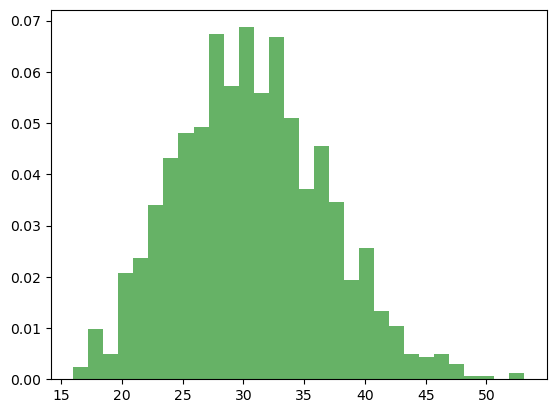

In [35]:
# Select the column (e.g., 'BMI')
column_data = df['BMI'].dropna()  # Dropping NaN values if any

# Fit a normal distribution to the column data
mu, std = stats.norm.fit(column_data)

# Plot the histogram
plt.hist(column_data, bins=30, density=True, alpha=0.6, color='g')

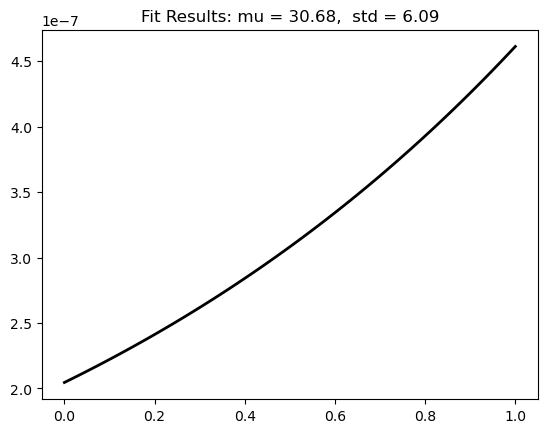

In [36]:
# Plot the probability density function (PDF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = f"Fit Results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)

plt.show()

In [39]:
# Selecting numerical columns
numerical_columns = df[['Age', 'BMI', 'Children', 'Expenses']]  # Update this based on your dataset

# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(numerical_columns)
df_standardized = pd.DataFrame(df_standardized, columns=numerical_columns.columns)

In [46]:
# Handling NaN values - Option 2: Dropping rows with NaN values
df.dropna(inplace=True)

# Check and handle infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Preparing the data
X = df.drop('Expenses', axis=1)  # Features
y = df['Expenses']  # Target variable

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Linear Regression model
model = LinearRegression()


# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 35405134.87719506
R^2 Score: 0.7608041536118314
